In [1]:
from pandas import factorize, read_csv
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
##################################################
# Question a
##################################################

# location of file
filename = 'Frogs_MFCCs.csv'

# Load the data with limited rows for faster processing
data = read_csv(filename)

data.dropna(axis = 0, how ='any', inplace=True)
columns = data.columns

numericColumns = data.select_dtypes(include=['float64', 'int64']).columns

dataset = data[numericColumns].values
y = data['Family'].values

print(y)
target_names = data['Family'].unique()

y, target_names = factorize(data['Family'])

# Display the first few rows to understand the dataset
print(data[numericColumns])

['Leptodactylidae' 'Leptodactylidae' 'Leptodactylidae' ... 'Hylidae'
 'Hylidae' 'Hylidae']
      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
7191       1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
7192       1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
7193       1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866   
7194       1.0 -0.508833 -0.324106  0.062068  0.078

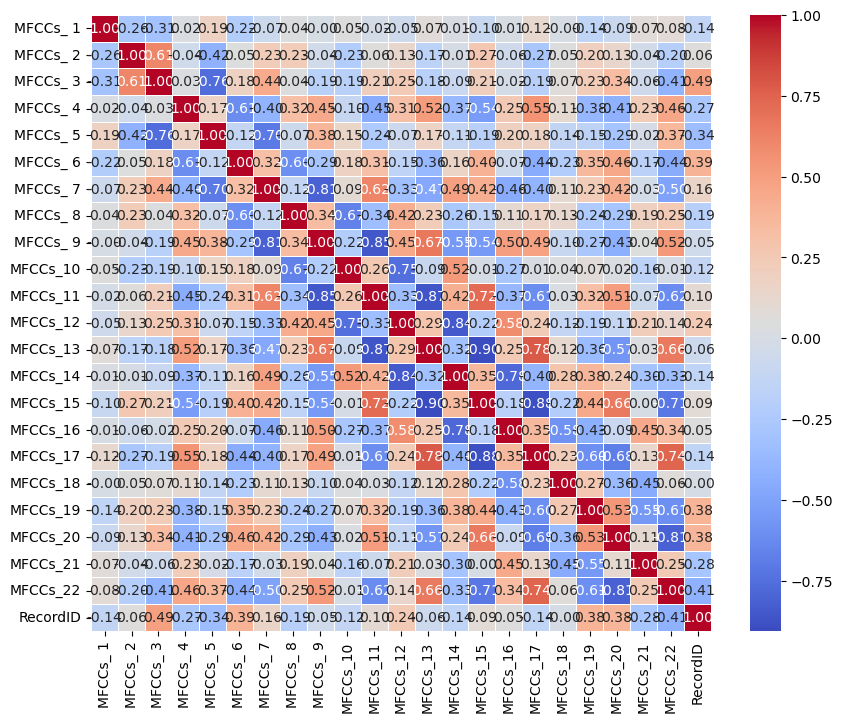

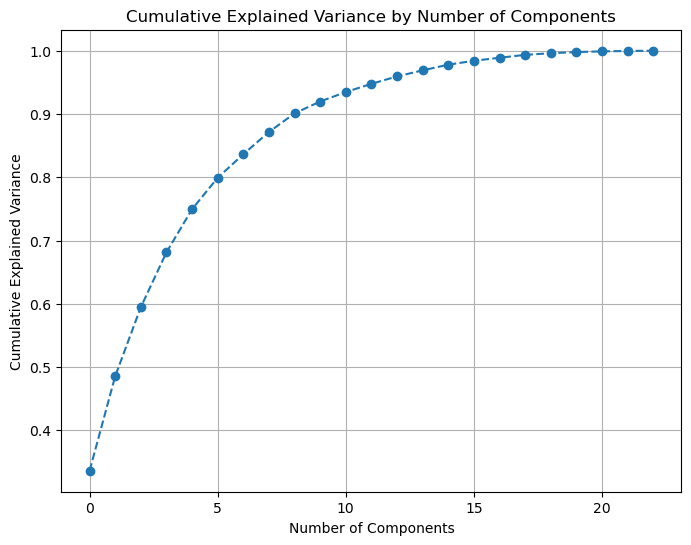

Number of components that explain 95.0% of the variance: 13


In [151]:
import seaborn as sns

numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numerical data
correlation_matrix = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Feature scaling
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(dataset)

pca = PCA()
dataset = pca.fit_transform(scaled_dataset)

cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8,6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

threshold = 0.95
num_components = next(i for i, cumulative_variance in enumerate(cumulative_variance) if cumulative_variance >= threshold) + 1

print(f'Number of components that explain {threshold*100}% of the variance: {num_components}')

In [6]:
pca = PCA(n_components=13)
dataset = pca.fit_transform(scaled_dataset)
print(dataset)
pca_df = pd.DataFrame(data=dataset, columns=[f'PC{i+1}' for i in range(dataset.shape[1])])
print(pca_df)

[[ 3.46353836 -1.93929165  3.21739321 ... -0.14202153 -0.45555445
   0.18133323]
 [ 3.47117128 -2.24627338  3.37242874 ... -0.3193289  -0.39282866
   0.10658172]
 [ 2.88421142 -2.44010414  3.23205048 ...  0.16615854 -0.6739625
  -0.31233627]
 ...
 [ 2.92628968 -1.32348737  2.17275856 ...  0.99969664  0.35630253
  -1.48620366]
 [ 3.26034212 -1.30626599  2.08928027 ...  0.91477133  0.1570832
  -1.36031004]
 [ 3.11307373 -1.28907647  2.0789854  ...  0.74432513  0.41892341
  -1.30231988]]
           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     3.463538 -1.939292  3.217393  1.187449 -0.494354  0.195368  0.898805   
1     3.471171 -2.246273  3.372429  1.042684 -0.213533  0.296982  1.061790   
2     2.884211 -2.440104  3.232050  1.381335  0.236942  0.338785  1.004451   
3     3.280863 -2.421703  3.555032  0.568319  0.234890  1.168082  1.078737   
4     3.018689 -2.700040  3.810968  1.286182  0.478014  0.441393  1.079399   
...        ...       ...       ...       .

In [9]:
# Function to calculate silhouette scores for k-means with clusters between 2 and 8
silhouette_scores = []
range_n_clusters = range(2, 9)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(dataset)
    silhouette_avg = silhouette_score(dataset, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the silhouette score is: {silhouette_avg}")
    
# Silhouette scores for k-means with clusters between 2 and 8
print("Silhouette_scores:", silhouette_scores)

For n_clusters = 2, the silhouette score is: 0.3420815067014344
For n_clusters = 3, the silhouette score is: 0.3685620495561986
For n_clusters = 4, the silhouette score is: 0.3764196477751757
For n_clusters = 5, the silhouette score is: 0.383430729919304
For n_clusters = 6, the silhouette score is: 0.39579893106740993
For n_clusters = 7, the silhouette score is: 0.3164303356861878
For n_clusters = 8, the silhouette score is: 0.26432240676165747
Silhouette_scores: [0.3420815067014344, 0.3685620495561986, 0.3764196477751757, 0.383430729919304, 0.39579893106740993, 0.3164303356861878, 0.26432240676165747]


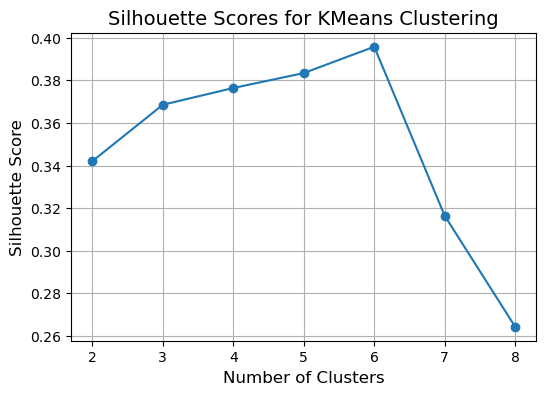

In [10]:
# Plotting the silhouette scores
plt.figure(figsize=(6, 4))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for KMeans Clustering', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True)
plt.show()

In [13]:
# Determine the 2 best values for the number of clusters
best_clusters = np.argsort(silhouette_scores)[-2:] + 2  # Adding 2 because of 0-indexing
print("The best two clusters are", best_clusters)

The best two clusters are [5 6]


In [15]:
##################################################
# Question b
##################################################

# Function for plotting the centroids for the clusters
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)
    
# Function for plotting the Voronoi diagram for the clusters
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))

    Z = np.zeros((resolution * resolution, X.shape[1]))
    means = X.mean(axis=0)
    Z[:, 0] = xx.ravel()
    Z[:, 1] = yy.ravel()
    for i in range(2, X.shape[1]):
        Z[:, i] = means[i]
    Z = clusterer.predict(Z)

    # Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

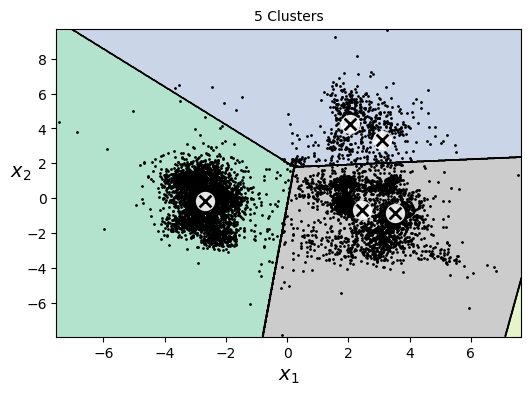

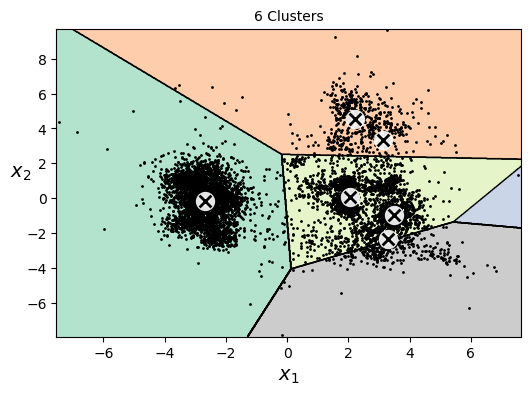

In [17]:
# Function for plotting the best two clusters
for i in best_clusters:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit_predict(dataset)
    kmeans.cluster_centers_
    plt.figure(figsize=(6, 4))
    plot_decision_boundaries(kmeans, dataset)
    title = str(i) + ' Clusters'
    plt.title(title, fontsize=10)
    plt.show()

In [19]:
from sklearn.cluster import MiniBatchKMeans

In [21]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=6, random_state=42)
minibatch_kmeans.fit(dataset)

MiniBatchKMeans(n_clusters=6, random_state=42)

In [23]:
minibatch_kmeans.inertia_

49007.157037133766

In [25]:
import urllib.request
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.int64)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

In [27]:
filename = "my_mnistttt.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [28]:
def load_next_batch(batch_size):
    return dataset[np.random.choice(len(dataset), batch_size, replace=False)]

In [29]:
np.random.seed(42)

100/100

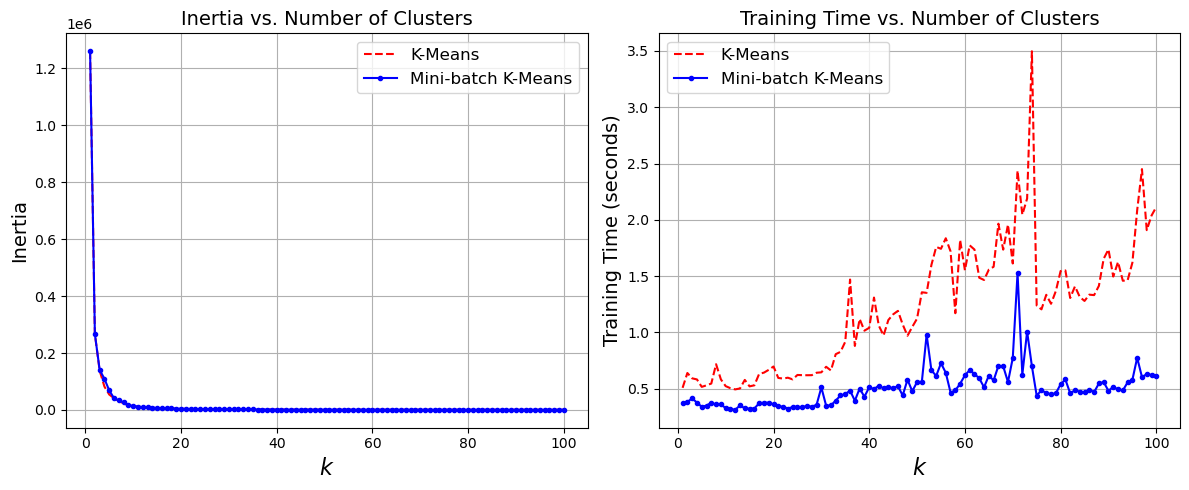

In [41]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from timeit import timeit
import matplotlib.pyplot as plt
import numpy as np

# Ensure `dataset` is pre-defined and numerical
# Example: Replace with your dataset
# dataset = np.random.rand(1000, 5)  # Example data for testing

# Initialize storage for times and inertias
times = np.empty((100, 2))
inertias = np.empty((100, 2))

# Loop through different values of k
for k in range(1, 101):  # Test on smaller range if needed, e.g., range(1, 11)
    kmeans_ = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    minibatch_kmeans = MiniBatchKMeans(
        n_clusters=k,
        random_state=42,
        n_init=5,
        batch_size=1024,
        init_size=2048,
        max_iter=100,
    )
    print("\r{}/{}".format(k, 100), end="")  # Display progress in console
    
    # Measure execution time
    times[k - 1, 0] = timeit(lambda: kmeans_.fit(dataset), number=1)
    times[k - 1, 1] = timeit(lambda: minibatch_kmeans.fit(dataset), number=1)
    
    # Store inertia
    inertias[k - 1, 0] = kmeans_.inertia_
    inertias[k - 1, 1] = minibatch_kmeans.inertia_

# Plot results
plt.figure(figsize=(12, 5))

# Inertia plot
plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.ylabel("Inertia", fontsize=14)
plt.title("Inertia vs. Number of Clusters", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Training time plot
plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.ylabel("Training Time (seconds)", fontsize=14)
plt.title("Training Time vs. Number of Clusters", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()


In [141]:
from sklearn.cluster import MiniBatchKMeans


range_n_clusters_MB = best_clusters
print(range_n_clusters_MB)
silhouette_scores_MB_best = []
kmeans_per_k_MB = []

for n_clusters in (range_n_clusters_MB):

    kmeans_MB = MiniBatchKMeans(n_clusters=n_clusters, random_state=0, batch_size=1000)
    
    cluster_labels_MB = kmeans_MB.fit_predict(dataset)
    
    silhouette_avg_MB = silhouette_score(dataset, cluster_labels_MB)
    silhouette_scores_MB_best.append(silhouette_avg_MB)
    kmeans_per_k_MB.append(kmeans_MB)
    

    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg_MB}")

[5, 6]
For n_clusters = 5, the silhouette score is: 0.5919019099676008
For n_clusters = 6, the silhouette score is: 0.572771768385605


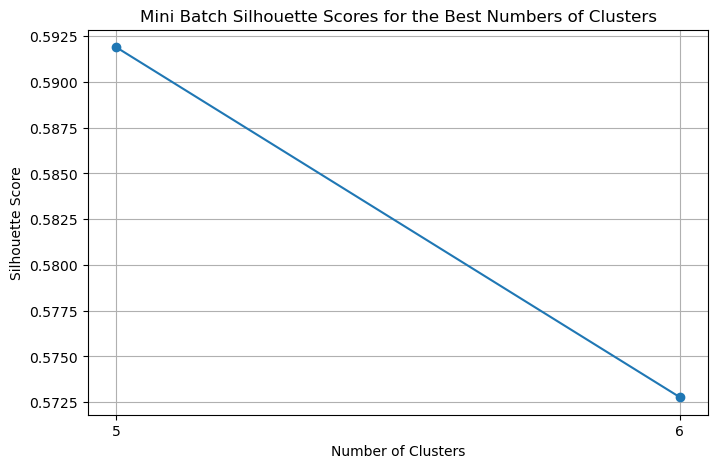

In [143]:
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters_MB, silhouette_scores_MB_best, marker='o')
plt.title("Mini Batch Silhouette Scores for the Best Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range_n_clusters_MB)
plt.grid()
plt.show()

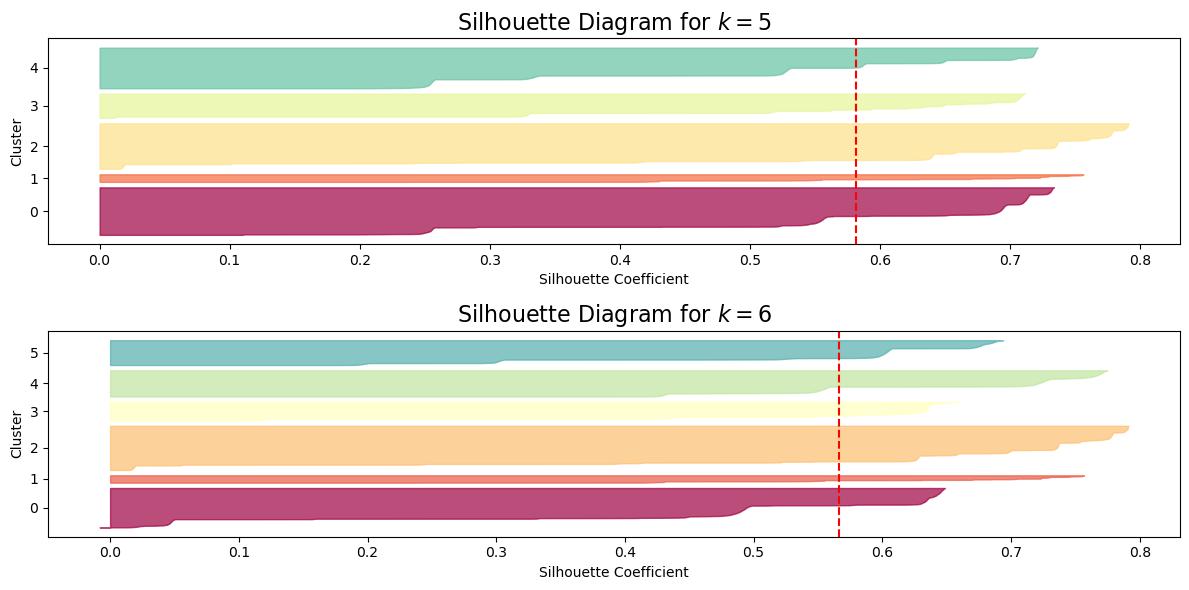

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

# Assuming datasetis your preprocessed dataset
# Example: dataset= some PCA-transformed dataset

# Step 1: Define the range of clusters and fit MiniBatchKMeans models
kmeans_per_k_MB = [MiniBatchKMeans(n_clusters=k, random_state=42).fit(dataset) for k in range(2, 11)]

# Step 2: Calculate silhouette scores for each k
silhouette_scores_MB = [
    silhouette_samples(dataset, model.labels_).mean() for model in kmeans_per_k_MB
]

# Step 3: Define the best clusters
best_clusters = [ 5, 6]  # Modify as needed

# Step 4: Plot Silhouette Diagrams
plt.figure(figsize=(12, len(best_clusters) * 3))  # Adjust height dynamically
for idx, k in enumerate(best_clusters):  # Loop through selected cluster counts
    plt.subplot(len(best_clusters), 1, idx + 1)  # Dynamic subplots for each cluster count

    # Retrieve the correct MiniBatchKMeans model
    kmeans_model = kmeans_per_k_MB[k - 2]  # k - 2 aligns with the list indexing
    y = kmeans_model.labels_

    # Calculate silhouette coefficients
    silhouette_coefficients_MB = silhouette_samples(dataset, y)

    # Padding and ticks setup
    padding = len(dataset) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients_MB[y == i]
        coeffs.sort()

        # Color for the current cluster
        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    # Configure y-axis with cluster labels
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.ylabel("Cluster")
    plt.xlabel("Silhouette Coefficient")
    plt.axvline(x=silhouette_scores_MB[k - 2], color="red", linestyle="--")  # Mean silhouette score
    plt.title(f"Silhouette Diagram for $k={k}$", fontsize=16)

# Adjust layout and display
plt.tight_layout()
plt.show()


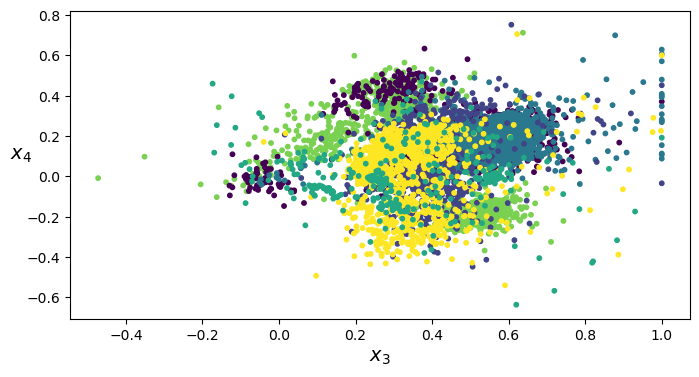

In [91]:
def plot_clusters(dataset, y=None): 
    if y is None:
        y = np.zeros(dataset.shape[0])
    plt.scatter(dataset[:, 3], dataset[:, 4], c=y, s=10)
    plt.xlabel("$x_3$", fontsize=14)
    plt.ylabel("$x_4$", fontsize=14, rotation=0)

y = kmeans_MB.predict(dataset)
plt.figure(figsize=(8, 4))
plot_clusters(dataset, y)
plt.show()

In [117]:
def plot_data(dataset):
    plt.plot(dataset[:, 3], dataset[:, 4], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 3], centroids[:, 4],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 3], centroids[:, 4],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, dataset, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = dataset.min(axis=0) - 0.1
    maxs = dataset.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[3], maxs[4], resolution),
                         np.linspace(mins[4], maxs[4], resolution))

    Z = np.zeros((resolution * resolution, dataset.shape[1]))
    means = dataset.mean(axis=0)
    Z[:, 3] = xx.ravel()
    Z[:, 4] = yy.ravel()

    for i in range(2, dataset.shape[1]):
        Z[:, i] = means[i]

    Z = clusterer.predict(Z)
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[3], maxs[3], mins[4], maxs[4]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[3], maxs[3], mins[4], maxs[4]),
                linewidths=1, colors='k')
    plot_data(dataset)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_3$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_4$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

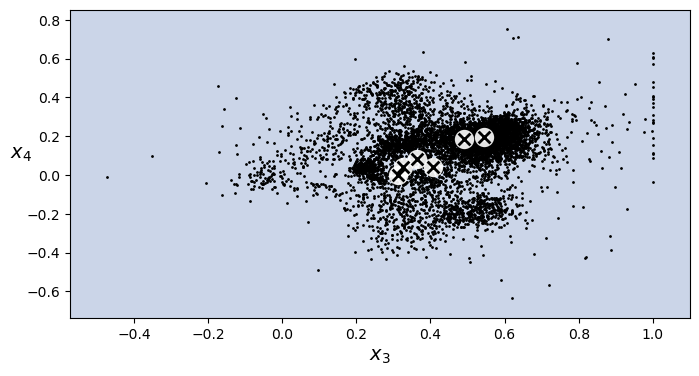

In [119]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_MB, dataset)
plt.show()

In [121]:
best_n_clusters_MB = np.argsort(silhouette_scores)[-2:] + 2
best_scores_MB = [silhouette_scores[i] for i in best_n_clusters_MB]

print("Best number of clusters:", best_n_clusters_MB)
print("Corresponding silhouette scores:", best_scores_MB)

Best number of clusters: [5 6]
Corresponding silhouette scores: [0.3164303356861878, 0.26432240676165747]


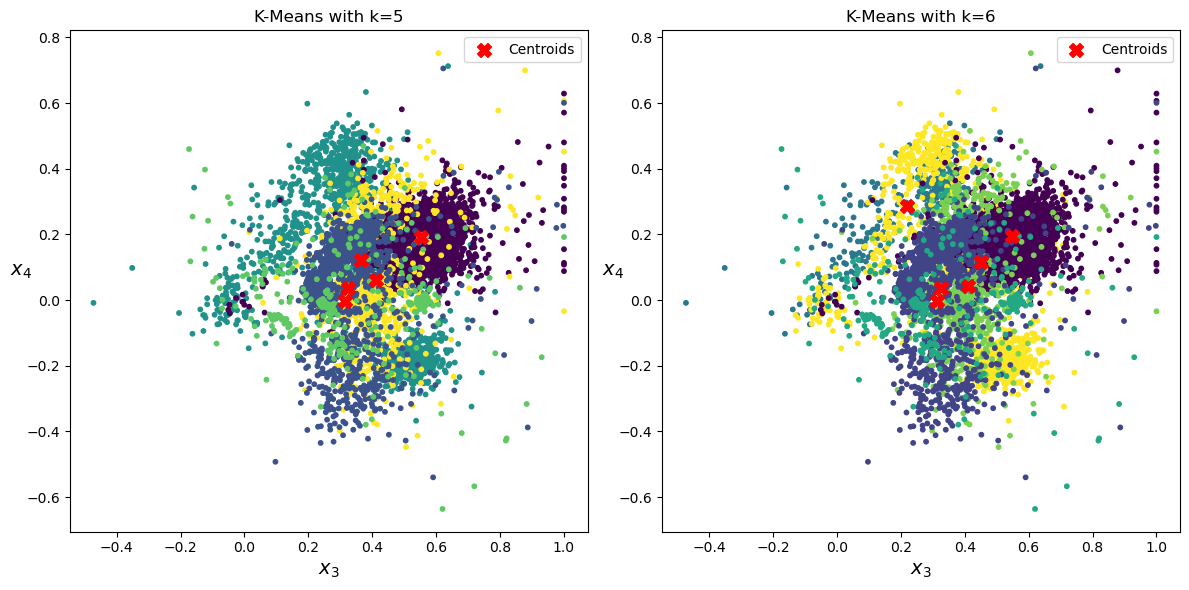

In [123]:
k1_MB = best_n_clusters_MB[0]
k2_MB = best_n_clusters_MB[1]

def fit_kmeans_and_voronoi(dataset, k):
    kmeans_MB = KMeans(n_clusters=k, random_state=42)
    kmeans_MB.fit(dataset)
    
    centroids_MB = kmeans_MB.cluster_centers_
    
    if len(centroids_MB) >= 8:
        vor = Voronoi(centroids_MB)
    else:
        vor = None
    
    return kmeans_MB, centroids_MB, vor

kmeans1_MB, centroids1, vor1 = fit_kmeans_and_voronoi(dataset, k1_MB)
kmeans2_MB, centroids2, vor2 = fit_kmeans_and_voronoi(dataset, k2_MB)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(dataset[:, 3], dataset[:, 4], c=kmeans1_MB.labels_, s=10)
if vor1 is not None:
    voronoi_plot_2d(vor1, ax=axs[0], show_vertices=False, line_colors='k', line_width=2, alpha=0.5)
axs[0].scatter(centroids1[:, 3], centroids1[:, 4], c='red', s=100, marker='X', label='Centroids')
axs[0].set_title(f'K-Means with k={k1_MB}')
axs[0].set_xlabel("$x_3$", fontsize=14)
axs[0].set_ylabel("$x_4$", fontsize=14, rotation=0)
axs[0].legend()

axs[1].scatter(dataset[:, 3], dataset[:, 4], c=kmeans2_MB.labels_, s=10)
if vor2 is not None:
    voronoi_plot_2d(vor2, ax=axs[1], show_vertices=False, line_colors='k', line_width=2, alpha=0.5)
axs[1].scatter(centroids2[:, 3], centroids2[:, 4], c='red', s=100, marker='X', label='Centroids')
axs[1].set_title(f'K-Means with k={k2_MB}')
axs[1].set_xlabel("$x_3$", fontsize=14)
axs[1].set_ylabel("$x_4$", fontsize=14, rotation=0)
axs[1].legend()

plt.tight_layout()
plt.show()

Length of silhouette_scores: 9
Length of silhouette_scores_MB: 9


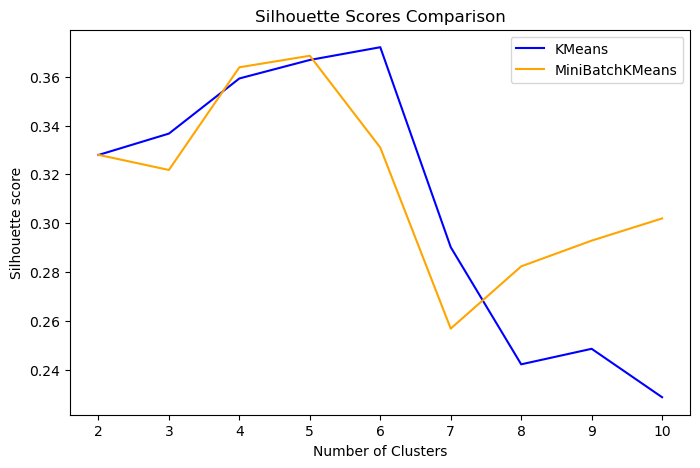

In [162]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans, MiniBatchKMeans

# Example dataset (replace dataset with your actual data)
# dataset = some PCA-transformed dataset

# Define the range of cluster values for which you want to calculate silhouette scores
cluster_range = range(2, 11)  # Assuming you want to test clusters from 2 to 10

# Calculate silhouette scores for KMeans
silhouette_scores = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset)
    silhouette_score = np.mean(silhouette_samples(dataset, kmeans.labels_))  # Mean silhouette score for each k
    silhouette_scores.append(silhouette_score)

# Calculate silhouette scores for MiniBatchKMeans
silhouette_scores_MB = []
for k in cluster_range:
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    minibatch_kmeans.fit(dataset)
    silhouette_score = np.mean(silhouette_samples(dataset, minibatch_kmeans.labels_))  # Mean silhouette score
    silhouette_scores_MB.append(silhouette_score)

# Check lengths of both lists to ensure they have the same size
print("Length of silhouette_scores:", len(silhouette_scores))
print("Length of silhouette_scores_MB:", len(silhouette_scores_MB))

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, color='blue', label='KMeans')  # Label for KMeans
plt.plot(cluster_range, silhouette_scores_MB, color='orange', label='MiniBatchKMeans')  # Label for MiniBatchKMeans

plt.title('Silhouette Scores Comparison')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette score')

plt.legend()  # Add the legend

plt.show()


In [166]:
kmeans_labels = np.array(cluster_labels)
minibatch_kmeans_labels = np.array(cluster_labels_MB)

labels_df = pd.DataFrame({'KMeans': kmeans_labels, 'MiniBatchKMeans': minibatch_kmeans_labels})
correlation_matrix = labels_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

print("\n")

calinski_harabasz_kmeans = calinski_harabasz_score(dataset, kmeans_labels)
calinski_harabasz_mini_batch = calinski_harabasz_score(dataset, minibatch_kmeans_labels)

print("Calinski-Harabasz Index:")
print(f"K-Means: {calinski_harabasz_kmeans}")
print(f"Mini-Batch K-Means: {calinski_harabasz_mini_batch}")

print("\n")

davies_bouldin_kmeans = davies_bouldin_score(dataset, kmeans_labels)
davies_bouldin_mini_batch = davies_bouldin_score(dataset, minibatch_kmeans_labels)

print("Davies-Bouldin Index:")
print(f"K-Means: {davies_bouldin_kmeans}")
print(f"Mini-Batch K-Means: {davies_bouldin_mini_batch}")


Correlation Matrix:
                   KMeans  MiniBatchKMeans
KMeans           1.000000        -0.105289
MiniBatchKMeans -0.105289         1.000000


Calinski-Harabasz Index:
K-Means: 1684.2088858579853
Mini-Batch K-Means: 823.5263081604982


Davies-Bouldin Index:
K-Means: 1.5509197498675138
Mini-Batch K-Means: 3.0880803560693906
